This document contains a few examples of how to do things in Quarto's world. All is coming from a Jupyter Notebook fully integrated with Datadex! 

We can display dataframes as tables:

In [1]:
# | label: tbl-planets
# | tbl-cap: Planets

from IPython.display import Markdown
from tabulate import tabulate

table = [
    ["Sun", 696000, 1989100000],
    ["Earth", 6371, 5973.6],
    ["Moon", 1737, 73.5],
    ["Mars", 3390, 641.85],
]
Markdown(tabulate(table, headers=["Planet", "R (km)", "mass (x 10^29 kg)"]))


Planet      R (km)    mass (x 10^29 kg)
--------  --------  -------------------
Sun         696000           1.9891e+09
Earth         6371        5973.6
Moon          1737          73.5
Mars          3390         641.85

We can do basic plots: 

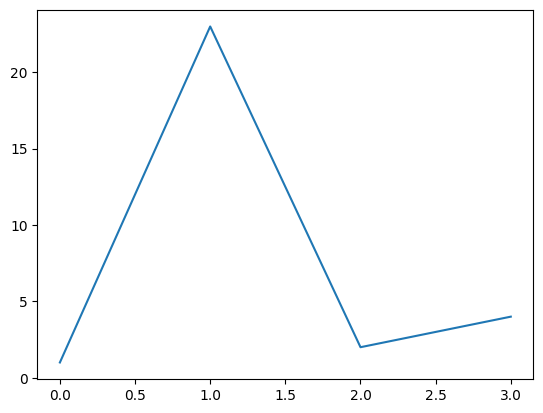

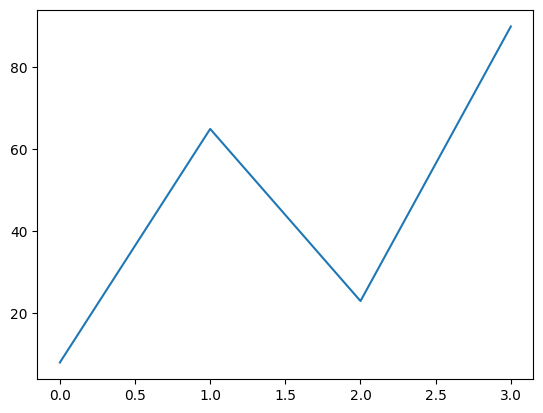

In [2]:
# | label: fig-charts
# | fig-cap: "Charts"
# | fig-subcap:
# |   - "First"
# |   - "Second"
# | layout-ncol: 2

import matplotlib.pyplot as plt

plt.plot([1, 23, 2, 4])
plt.show()

plt.plot([8, 65, 23, 90])
plt.show()


But also dynamic graphs:

In [3]:
import altair as alt
import pandas as pd
import numpy as np

np.random.seed(42)
source = pd.DataFrame(
    np.cumsum(np.random.randn(100, 3), 0).round(2),
    columns=["A", "B", "C"],
    index=pd.RangeIndex(100, name="x"),
)
source = source.reset_index().melt("x", var_name="category", value_name="y")

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection_point(nearest=True, on="mouseover", fields=["x"], empty=False)

# The basic line
line = (
    alt.Chart(source)
    .mark_line(interpolate="basis")
    .encode(x="x:Q", y="y:Q", color="category:N")
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = (
    alt.Chart(source)
    .mark_point()
    .encode(
        x="x:Q",
        opacity=alt.value(0),
    )
    .add_params(nearest)
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align="left", dx=5, dy=-5).encode(
    text=alt.condition(nearest, "y:Q", alt.value(" "))
)

# Draw a rule at the location of the selection
rules = (
    alt.Chart(source)
    .mark_rule(color="gray")
    .encode(
        x="x:Q",
    )
    .transform_filter(nearest)
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text).properties(
    width="container", height=300
)


alt.LayerChart(...)

We can even embed a whole dataset and interact with it Tabelau style.

In [4]:
import pygwalker as pyg

pyg.walk(source)


Notice you can drag and drop columns to change the graph to your heart's content. A·we·some!